### Efficient and Accurate Scene Text detection pipeline (EAST)
###### https://www.pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/


C++ implementation is able to rotate bounding boxes, though Python is not.<br>
Also EAST requires all shapes of image to be **multiple of 32**

In [1]:
import os
import time
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('sample.png')

image = cv2.resize(image, (960, 960))
h, w = image.shape[:2]

Load pretrained network

In [3]:
layers = ["feature_fusion/Conv_7/Sigmoid", "feature_fusion/concat_3"]
net = cv2.dnn.readNet("frozen_east_text_detection.pb")

blob = cv2.dnn.blobFromImage(image, 1.0, (w, h), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

scores, geometry = net.forward(layers)

In [4]:
cv2.imshow('zx', image)
if cv2.waitKey(0) == ord('q'):
    cv2.destroyWindow('zx')

**rects:** Stores the bounding box (x, y)-coordinates for text regions<br>
**confidences:** Stores the probability associated with each of the bounding boxes in rects

In [5]:
min_conf = 0.5
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []
 
# loop over the number of rows
for y in range(0, numRows):
    # extract the scores (probabilities), followed by the geometrical
    # data used to derive potential bounding box coordinates that
    # surround text
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]
    
    for x in range(0, numCols):
        if scoresData[x] < 0.5:
            continue         
        (offsetX, offsetY) = (x * 4.0, y * 4.0)
  
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)
   
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]

        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)

        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])

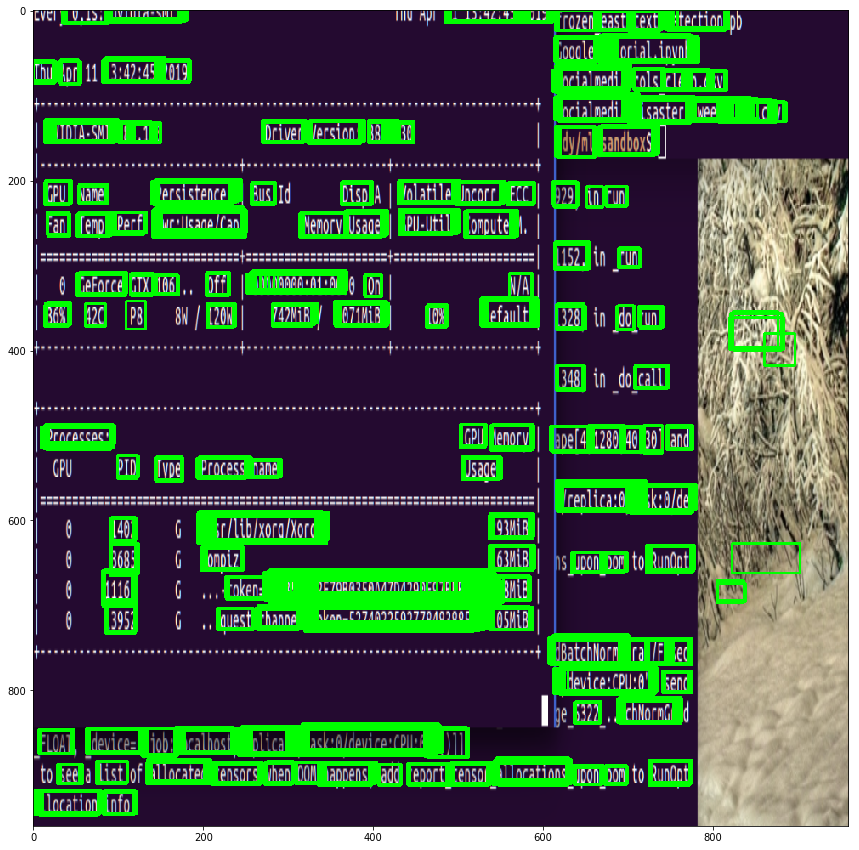

In [10]:
for (startX, startY, endX, endY) in rects:
    # scale the bounding box coordinates based on the respective
    # ratios
    startX = int(startX)
    startY = int(startY)
    endX = int(endX)
    endY = int(endY)
 
    # draw the bounding box on the image
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(image)
